# Single-Task Learning on Cifar100 Dataset (100 Classes): A CNN Approach
- **Name**: Minh T. Nguyen & Peter Chen.
- **ECE 6524** - Final Project.
- **Date**: 4/18/2023.
- **Objective**: Build a Single Task CNN model using ResNet152 architecture for 100-classes image classification on Cifar100.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# import tensorflow
import tensorflow as tf
from keras.datasets import cifar100
from keras.utils import np_utils, plot_model
from keras.layers import Input, Dropout, Flatten, Dense
from keras.applications.resnet import ResNet152, preprocess_input
from keras import Model, Sequential

# 1. Data Visualization & Preprocessing

In [2]:
num_classes = 100         # number of classes
input_shape = (32, 32, 3) # original input image size

In [3]:
# download data from Keras API
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 17s 0us/step


In [4]:
# check dataset size
print(f"X={X_train.shape}, y={y_train.shape}")
print(f"X={X_test.shape}, y={y_test.shape}")

X=(50000, 32, 32, 3), y=(50000, 1)
X=(10000, 32, 32, 3), y=(10000, 1)


## 1.1. Data Visualization

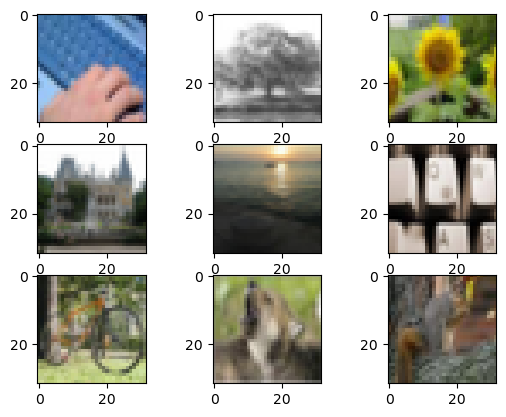

In [5]:
# plot the 9 images
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(X_train[10])
axarr[0,1].imshow(X_train[11])
axarr[0,2].imshow(X_train[12])
axarr[1,0].imshow(X_train[13])
axarr[1,1].imshow(X_train[14])
axarr[1,2].imshow(X_train[15])
axarr[2,0].imshow(X_train[16])
axarr[2,1].imshow(X_train[17])
axarr[2,2].imshow(X_train[18])
plt.show()

## 1.2. Data Preprocessing

In [6]:
# normalize input data
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [7]:
# convert class into one hot encoder
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

y_train:  (50000, 100)
y_test:  (10000, 100)


# 2. Modeling
**Note**: Build a sequential model using ResNet152 architecture

In [8]:
# Define ResNet152 CNN model
def create_model(dropout):
    input_shape = (32, 32, 3)
    
    resnet152_base = ResNet152(weights=None, include_top=False, input_shape=input_shape)
    
    model = Sequential()
    
    model.add(resnet152_base)
    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(100, activation='softmax'))
    
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 1, 1, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               5

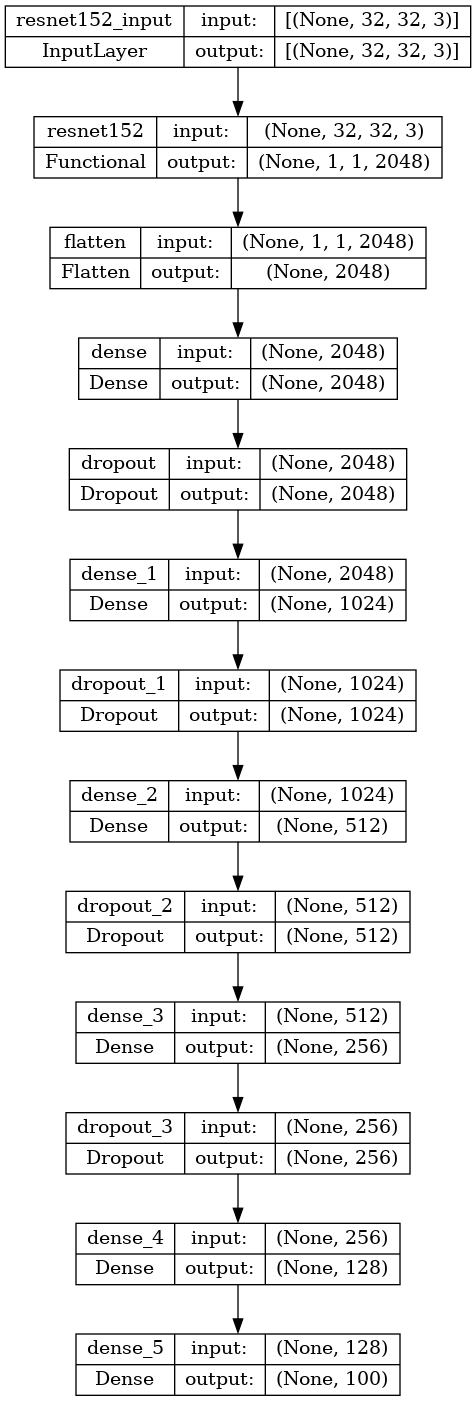

In [9]:
# display and plot model
model = create_model(0)
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
# define number of epochs
epochs = 20

# 2.1 Model 1 (Batch Size = 256, Dropout = 0, Optimizer = Adam)


In [11]:
# define parameters and generate model
batch_size = 256
dropout = 0
optimizer = 'Adam'

model_1 = create_model(dropout)

In [12]:
# compile model
model_1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [13]:
# train model
history_1 = model_1.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
167/167 [==============================] - 139s 206ms/step - loss: 4.5517 - accuracy: 0.0170 - val_loss: 4.5914 - val_accuracy: 0.0081
Epoch 2/20
167/167 [==============================] - 31s 186ms/step - loss: 4.2824 - accuracy: 0.0291 - val_loss: 5.1615 - val_accuracy: 0.0241
Epoch 3/20
167/167 [==============================] - 32s 191ms/step - loss: 4.2430 - accuracy: 0.0329 - val_loss: 5.4938 - val_accuracy: 0.0231
Epoch 4/20
167/167 [==============================] - 31s 183ms/step - loss: 4.1545 - accuracy: 0.0378 - val_loss: 4.2557 - val_accuracy: 0.0323
Epoch 5/20
167/167 [==============================] - 32s 190ms/step - loss: 4.0975 - accuracy: 0.0445 - val_loss: 4.1784 - val_accuracy: 0.0423
Epoch 6/20
167/167 [==============================] - 32s 189ms/step - loss: 4.0156 - accuracy: 0.0472 - val_loss: 4.3917 - val_accuracy: 0.0336
Epoch 7/20
167/167 [==============================] - 32s 190ms/step - loss: 4.0561 - accuracy: 0.0457 - val_loss: 4.0625 - val_a

In [14]:
# train model results
print('Train Loss:', history_1.history['loss'][-1])
print('Train Acc:', history_1.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_1.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 2.7513153553009033
Train Acc: 0.2693411707878113

Test Loss: 3.314927816390991
Test Acc: 0.20960000157356262


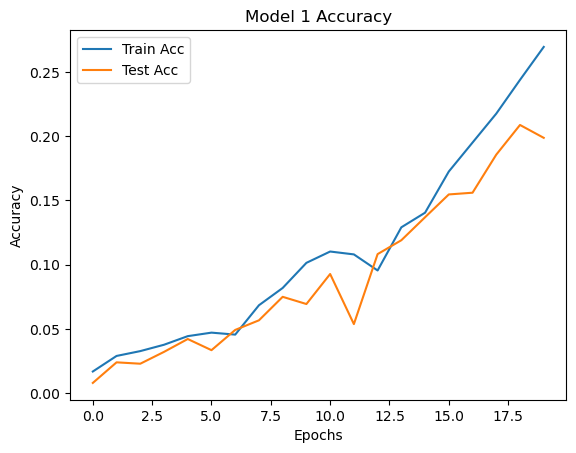

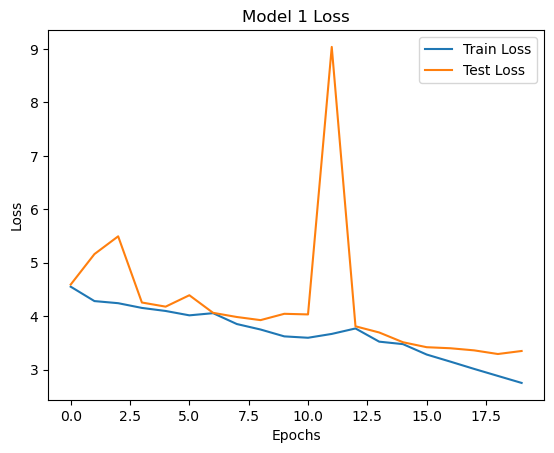

In [15]:
# Accuracy Plot
plt.plot(history_1.history['accuracy'], label='Train Acc')
plt.plot(history_1.history['val_accuracy'], label='Test Acc')
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Test Loss')
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.2 Model 2 (Batch Size = 128, Dropout = 0, Optimizer = Adam)

In [16]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'Adam'

model_2 = create_model(dropout)

In [17]:
# compile model
model_2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [18]:
# train model
history_2 = model_2.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
333/333 [==============================] - 146s 142ms/step - loss: 4.4493 - accuracy: 0.0225 - val_loss: 4.3678 - val_accuracy: 0.0260
Epoch 2/20
333/333 [==============================] - 45s 135ms/step - loss: 4.1615 - accuracy: 0.0352 - val_loss: 4.3563 - val_accuracy: 0.0311
Epoch 3/20
333/333 [==============================] - 45s 134ms/step - loss: 4.0540 - accuracy: 0.0484 - val_loss: 4.0564 - val_accuracy: 0.0565
Epoch 4/20
333/333 [==============================] - 45s 136ms/step - loss: 3.8909 - accuracy: 0.0668 - val_loss: 3.9660 - val_accuracy: 0.0657
Epoch 5/20
333/333 [==============================] - 45s 134ms/step - loss: 3.8205 - accuracy: 0.0769 - val_loss: 4.0705 - val_accuracy: 0.0601
Epoch 6/20
333/333 [==============================] - 45s 134ms/step - loss: 3.6800 - accuracy: 0.0971 - val_loss: 3.7870 - val_accuracy: 0.0913
Epoch 7/20
333/333 [==============================] - 45s 136ms/step - loss: 3.5355 - accuracy: 0.1195 - val_loss: 8.0224 - val_a

In [19]:
# train model results
print('Train Loss:', history_2.history['loss'][-1])
print('Train Acc:', history_2.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_2.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 2.852570056915283
Train Acc: 0.2737882435321808

Test Loss: 3.773818254470825
Test Acc: 0.25040000677108765


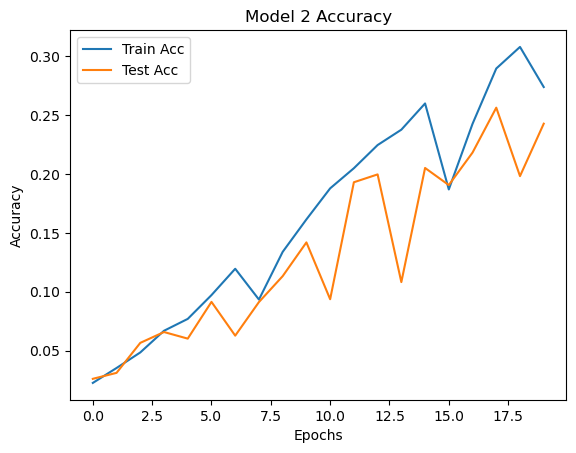

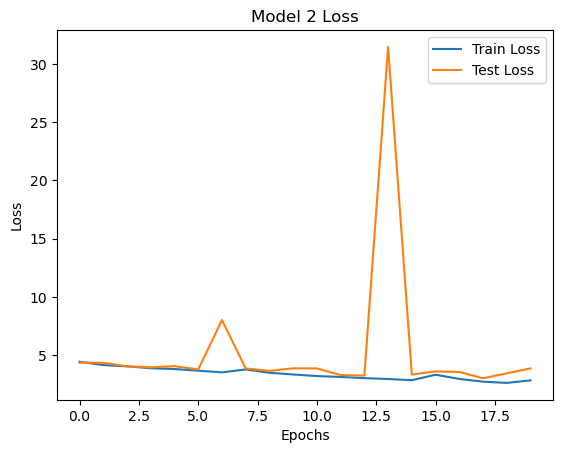

In [20]:
# Accuracy Plot
plt.plot(history_2.history['accuracy'], label='Train Acc')
plt.plot(history_2.history['val_accuracy'], label='Test Acc')
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Test Loss')
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.3 Model 3 (Batch Size = 256, Dropout = 0.5, Optimizer = Adam)

In [21]:
# define parameters and generate model
batch_size = 128
dropout = 0.5
optimizer = 'Adam'

model_3 = create_model(dropout)

In [22]:
# compile model
model_3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [23]:
# train model
history_3 = model_3.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
333/333 [==============================] - 146s 145ms/step - loss: 4.7307 - accuracy: 0.0103 - val_loss: 4.6024 - val_accuracy: 0.0095
Epoch 2/20
333/333 [==============================] - 45s 134ms/step - loss: 4.5922 - accuracy: 0.0137 - val_loss: 4.5783 - val_accuracy: 0.0116
Epoch 3/20
333/333 [==============================] - 46s 137ms/step - loss: 4.5713 - accuracy: 0.0144 - val_loss: 4.5631 - val_accuracy: 0.0172
Epoch 4/20
333/333 [==============================] - 45s 136ms/step - loss: 4.4883 - accuracy: 0.0181 - val_loss: 4.4648 - val_accuracy: 0.0212
Epoch 5/20
333/333 [==============================] - 46s 138ms/step - loss: 4.4158 - accuracy: 0.0226 - val_loss: 4.3719 - val_accuracy: 0.0240
Epoch 6/20
333/333 [==============================] - 46s 137ms/step - loss: 4.3483 - accuracy: 0.0241 - val_loss: 4.2950 - val_accuracy: 0.0224
Epoch 7/20
333/333 [==============================] - 46s 138ms/step - loss: 4.2772 - accuracy: 0.0289 - val_loss: 4.3387 - val_a

In [24]:
# train model results
print('Train Loss:', history_3.history['loss'][-1])
print('Train Acc:', history_3.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_3.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 3.7143688201904297
Train Acc: 0.08927059173583984

Test Loss: 3.8083643913269043
Test Acc: 0.08150000125169754


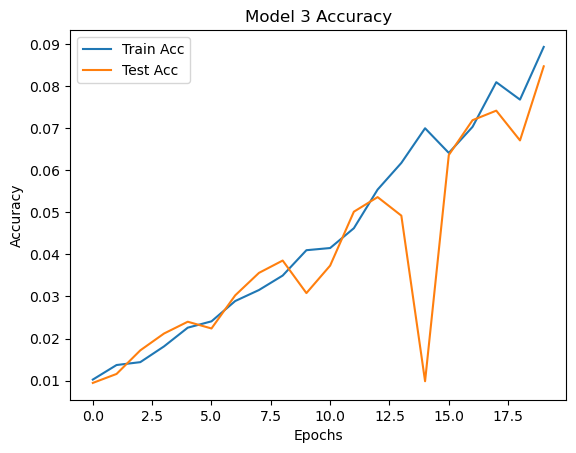

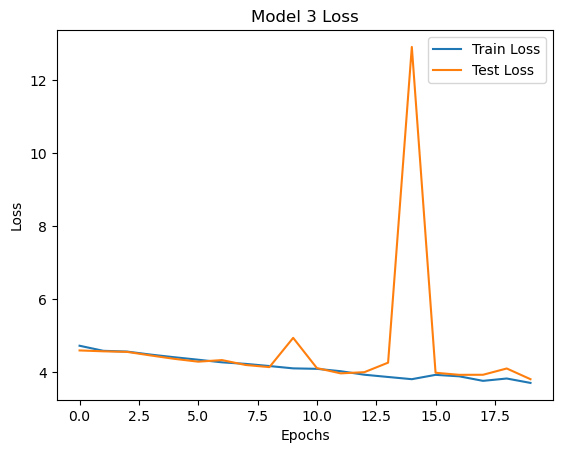

In [25]:
# Accuracy Plot
plt.plot(history_3.history['accuracy'], label='Train Acc')
plt.plot(history_3.history['val_accuracy'], label='Test Acc')
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Test Loss')
plt.title('Model 3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.4 Model 4 (Batch Size = 256, Dropout = 0, Optimizer = SGD)

In [26]:
# define parameters and generate model
batch_size = 256
dropout = 0
optimizer = 'SGD'

model_4 = create_model(dropout)

In [27]:
# compile model
model_4.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [28]:
# train model
history_4 = model_4.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
167/167 [==============================] - 78s 198ms/step - loss: 4.5918 - accuracy: 0.0147 - val_loss: 13011170705276928.0000 - val_accuracy: 0.0108
Epoch 2/20
167/167 [==============================] - 31s 183ms/step - loss: 4.5666 - accuracy: 0.0225 - val_loss: 2136.0510 - val_accuracy: 0.0103
Epoch 3/20
167/167 [==============================] - 30s 177ms/step - loss: 4.5438 - accuracy: 0.0229 - val_loss: 424204009472.0000 - val_accuracy: 0.0105
Epoch 4/20
167/167 [==============================] - 31s 184ms/step - loss: 4.5238 - accuracy: 0.0228 - val_loss: 24.3404 - val_accuracy: 0.0092
Epoch 5/20
167/167 [==============================] - 30s 183ms/step - loss: 4.4985 - accuracy: 0.0243 - val_loss: 11.5945 - val_accuracy: 0.0092
Epoch 6/20
167/167 [==============================] - 31s 184ms/step - loss: 4.4668 - accuracy: 0.0243 - val_loss: 5.6904 - val_accuracy: 0.0085
Epoch 7/20
167/167 [==============================] - 31s 183ms/step - loss: 4.4530 - accuracy: 0.

In [29]:
# train model results
print('Train Loss:', history_4.history['loss'][-1])
print('Train Acc:', history_4.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_4.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 4.204103946685791
Train Acc: 0.041505880653858185

Test Loss: 4.588850975036621
Test Acc: 0.016200000420212746


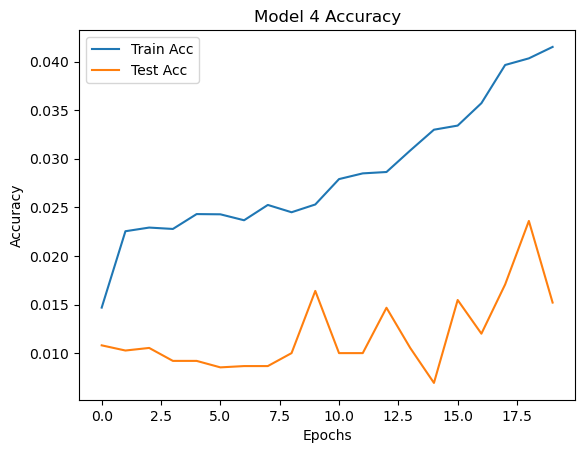

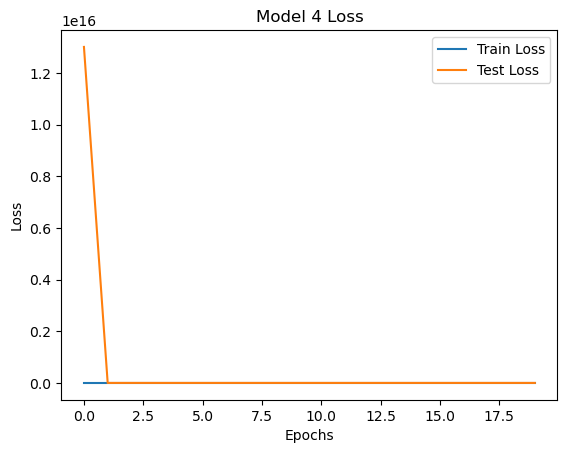

In [30]:
# Accuracy Plot
plt.plot(history_4.history['accuracy'], label='Train Acc')
plt.plot(history_4.history['val_accuracy'], label='Test Acc')
plt.title('Model 4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_4.history['loss'], label='Train Loss')
plt.plot(history_4.history['val_loss'], label='Test Loss')
plt.title('Model 4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.5 Model 5 (Batch Size = 128, Dropout = 0, Optimizer = SGD)

In [31]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'SGD'

model_5 = create_model(dropout)

In [32]:
# compile model
model_5.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [33]:
# train model
history_5 = model_5.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
333/333 [==============================] - 90s 140ms/step - loss: 4.5756 - accuracy: 0.0192 - val_loss: 6054701.0000 - val_accuracy: 0.0105
Epoch 2/20
333/333 [==============================] - 43s 131ms/step - loss: 4.5185 - accuracy: 0.0253 - val_loss: 55.9864 - val_accuracy: 0.0101
Epoch 3/20
333/333 [==============================] - 43s 130ms/step - loss: 4.3812 - accuracy: 0.0350 - val_loss: 5.2742 - val_accuracy: 0.0139
Epoch 4/20
333/333 [==============================] - 43s 129ms/step - loss: 4.2597 - accuracy: 0.0448 - val_loss: 7.0166 - val_accuracy: 0.0117
Epoch 5/20
333/333 [==============================] - 43s 129ms/step - loss: 4.1808 - accuracy: 0.0549 - val_loss: 4.7202 - val_accuracy: 0.0147
Epoch 6/20
333/333 [==============================] - 43s 130ms/step - loss: 4.0872 - accuracy: 0.0645 - val_loss: 5.6947 - val_accuracy: 0.0155
Epoch 7/20
333/333 [==============================] - 42s 128ms/step - loss: 4.0029 - accuracy: 0.0759 - val_loss: 7.5483 -

In [34]:
# train model results
print('Train Loss:', history_5.history['loss'][-1])
print('Train Acc:', history_5.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_5.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 3.224518060684204
Train Acc: 0.20345883071422577

Test Loss: 4.175605297088623
Test Acc: 0.09300000220537186


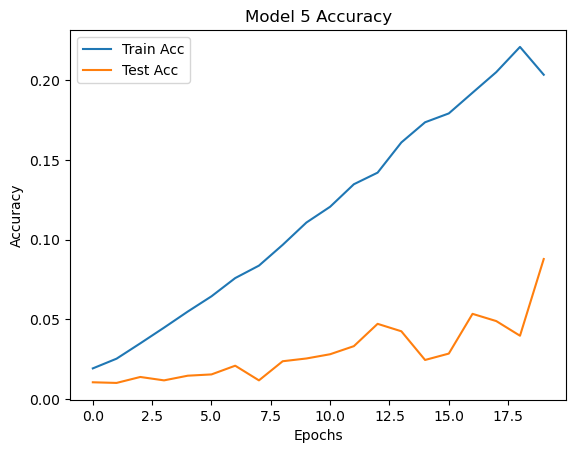

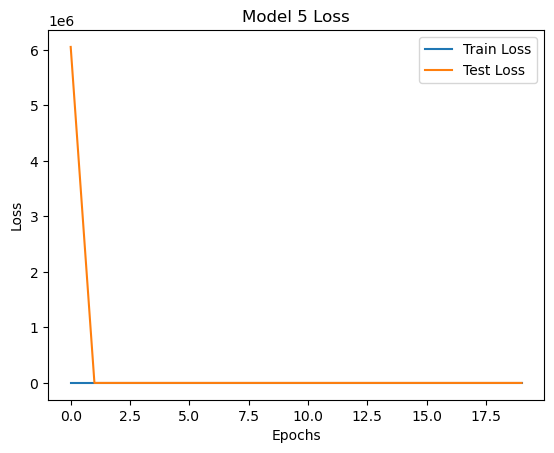

In [35]:
# Accuracy Plot
plt.plot(history_5.history['accuracy'], label='Train Acc')
plt.plot(history_5.history['val_accuracy'], label='Test Acc')
plt.title('Model 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_5.history['loss'], label='Train Loss')
plt.plot(history_5.history['val_loss'], label='Test Loss')
plt.title('Model 5 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.6 Model 6 (Batch Size = 256, Dropout = 0.5, Optimizer = SGD)

In [36]:
# define parameters and generate model
batch_size = 256
dropout = 0.5
optimizer = 'SGD'

model_6 = create_model(dropout)

In [37]:
# compile model
model_6.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [38]:
# train model
history_6 = model_6.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
167/167 [==============================] - 76s 202ms/step - loss: 4.8056 - accuracy: 0.0100 - val_loss: 59.5574 - val_accuracy: 0.0144
Epoch 2/20
167/167 [==============================] - 31s 184ms/step - loss: 4.6399 - accuracy: 0.0104 - val_loss: 8.5980 - val_accuracy: 0.0121
Epoch 3/20
167/167 [==============================] - 31s 183ms/step - loss: 4.6166 - accuracy: 0.0104 - val_loss: 4.6432 - val_accuracy: 0.0161
Epoch 4/20
167/167 [==============================] - 31s 184ms/step - loss: 4.6095 - accuracy: 0.0107 - val_loss: 4.6427 - val_accuracy: 0.0101
Epoch 5/20
167/167 [==============================] - 30s 177ms/step - loss: 4.6044 - accuracy: 0.0111 - val_loss: 4.8717 - val_accuracy: 0.0148
Epoch 6/20
167/167 [==============================] - 31s 183ms/step - loss: 4.5988 - accuracy: 0.0120 - val_loss: 4.8813 - val_accuracy: 0.0123
Epoch 7/20
167/167 [==============================] - 31s 184ms/step - loss: 4.5974 - accuracy: 0.0118 - val_loss: 5.8330 - val_a

In [39]:
# train model results
print('Train Loss:', history_6.history['loss'][-1])
print('Train Acc:', history_6.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_6.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 4.580094337463379
Train Acc: 0.013623529113829136

Test Loss: 4.594844341278076
Test Acc: 0.014600000344216824


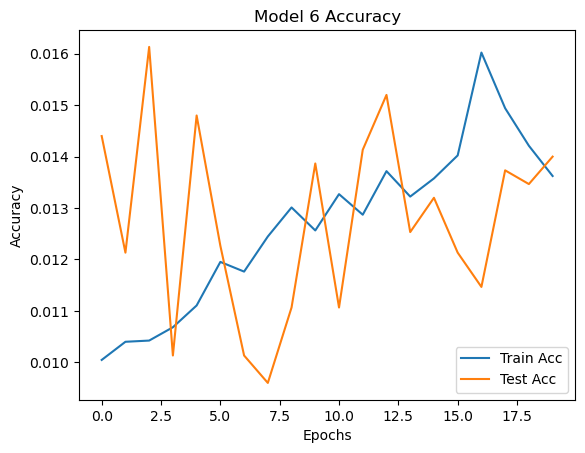

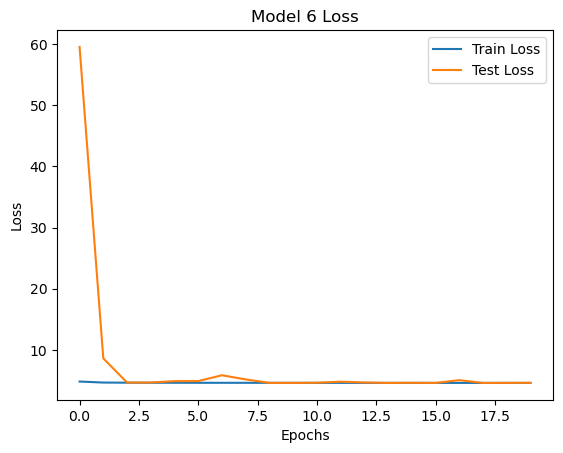

In [40]:
# Accuracy Plot
plt.plot(history_6.history['accuracy'], label='Train Acc')
plt.plot(history_6.history['val_accuracy'], label='Test Acc')
plt.title('Model 6 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_6.history['loss'], label='Train Loss')
plt.plot(history_6.history['val_loss'], label='Test Loss')
plt.title('Model 6 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()